In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import torch
import numpy as np
torch.__version__

'0.4.1.post2'

## 1. Tensor basics

PyTorch is a library for training deep neural networks, and much of it is based on the `Tensor`, an array type that is similar to NumPy arrays.

Under the hood, PyTorch runs on compiled C, and if available, CUDA and cuDNN code.

In [3]:
tensor = torch.Tensor([0, 1, 2, 3])

In [4]:
print(tensor.shape)
print(tensor.dtype)

torch.Size([4])
torch.float32


In [5]:
tensor.sum()

tensor(6.)

It's easy to convert between NumPy arrays PyTorch Tensors.

In [6]:
tensor.numpy()

array([0., 1., 2., 3.], dtype=float32)

In [7]:
# A better alternative to torch.Tensor(arr)
torch.from_numpy(np.arange(5)) # this is inplace, unlike torch.Tensor

tensor([0, 1, 2, 3, 4])

## 2. Using CUDA

**The following code only works if you have PyTorch set up for a GPU.**

In [8]:
assert torch.cuda.is_available and torch.has_cudnn

In [9]:
x = torch.Tensor(range(5))
y = torch.Tensor(np.ones(5))

It's similarly easy to move Tensors onto a GPU.

In [10]:
x.cuda()

tensor([0., 1., 2., 3., 4.], device='cuda:0')

In [11]:
z = x.cuda() + y.cuda()
print(z)

tensor([1., 2., 3., 4., 5.], device='cuda:0')


In [12]:
z.cpu()

tensor([1., 2., 3., 4., 5.])

In [13]:
if torch.cuda.is_available and torch.has_cudnn:
    device = torch.device('cuda')
else:
    device = torch.device("cpu")

In [14]:
z = x.to(device) + y.to(device)
print(z)

tensor([1., 2., 3., 4., 5.], device='cuda:0')


## 3. Exercises

* (Taken from DS-GA 1011, Fall 2017)

1) Initialize random tensors A, B, C of size [2,3], [2,3], [3,3,2].

In [35]:
A = torch.from_numpy(np.random.random((2,3)))
B = torch.from_numpy(np.random.random((2,3)))
C = torch.from_numpy(np.random.random((3,3,2)))
A, B, C

(tensor([[0.9300, 0.8611, 0.8363],
         [0.6444, 0.9312, 0.3732]], dtype=torch.float64),
 tensor([[0.6157, 0.4155, 0.9577],
         [0.5743, 0.6710, 0.7813]], dtype=torch.float64),
 tensor([[[0.8075, 0.6783],
          [0.0646, 0.3027],
          [0.5471, 0.0125]],
 
         [[0.4627, 0.4488],
          [0.5564, 0.7505],
          [0.9059, 0.1614]],
 
         [[0.9634, 0.0282],
          [0.7441, 0.4344],
          [0.5153, 0.0386]]], dtype=torch.float64))

2) Fill tensor A with all 10s

In [36]:
A.fill_(10)
A

tensor([[10., 10., 10.],
        [10., 10., 10.]], dtype=torch.float64)

3) Fill tensor B with elements sampled from the normal distribution

In [37]:
B.normal_()
B

tensor([[-1.1180,  0.8018, -2.9553],
        [-2.0034, -0.8522,  1.6490]], dtype=torch.float64)

4) Point-wise multiply A with B, and put the result into tensor B

In [38]:
B.mul_(A)
B

tensor([[-11.1798,   8.0185, -29.5529],
        [-20.0336,  -8.5219,  16.4896]], dtype=torch.float64)

5) Print the mean and standard deviation of the elements of B

In [39]:
B.mean(), B.std()

(tensor(-7.4634, dtype=torch.float64), tensor(17.1716, dtype=torch.float64))

6) Fill tensor C with elements samples from the uniform distribution U(-1,1). Print the dimensions of C.

In [40]:
C.uniform_(-1,1)
print(C)
print(C.size())

tensor([[[ 0.0033, -0.9362],
         [-0.1627, -0.2617],
         [ 0.5622,  0.6178]],

        [[ 0.3278,  0.6383],
         [-0.9355, -0.3624],
         [-0.3369,  0.2846]],

        [[ 0.5988, -0.9512],
         [ 0.6017, -0.6343],
         [-0.3978,  0.6128]]], dtype=torch.float64)
torch.Size([3, 3, 2])


7) Transpose the second and third dimension of tensor C, and put the result into tensor C itself (in-place). Print the dimensions of C.

In [41]:
C.transpose_(1,2)
C.size()

torch.Size([3, 2, 3])

8) Show the contiguity property of the tensors

In [43]:
A.is_contiguous(), B.is_contiguous(), C.is_contiguous()

(True, True, False)

9) Print the second column of the third dimension of tensor C (note zero-indexed)

In [44]:
C[2,1]

tensor([-0.9512, -0.6343,  0.6128], dtype=torch.float64)

10) Perform operation A+B+C (note the broadcasting)

In [45]:
A+B+C

tensor([[[ -1.1765,  17.8558, -18.9907],
         [-10.9698,   1.2165,  27.1074]],

        [[ -0.8519,  17.0829, -19.8899],
         [ -9.3953,   1.1158,  26.7741]],

        [[ -0.5809,  18.6202, -19.9507],
         [-10.9848,   0.8438,  27.1024]]], dtype=torch.float64)

## 4. Autograd

Autograd is a submodule in PyTorch that handles automatic differentiations and gradient computation. This allows you to simply a define model once, in a forward fashion, and the library handles the computation of all gradients in the computational graph.

Here, we create 2 Tensors, but we want PyTorch to compute gradients with respect to $x$. By default, for arbitrary computations in PyTorch, no gradiens are computed (e.g for $y$).

In [46]:
x = torch.randn(5, requires_grad=True)
y = torch.arange(5.)

In [47]:
print(x)
print(x.grad)

tensor([-1.3150,  0.5678, -1.2118,  1.1134, -1.1142], requires_grad=True)
None


In [48]:
print(y)
print(y.grad)

tensor([0., 1., 2., 3., 4.])
None


We defined $z = x \cdot y$. Then

$$\frac{dz}{dx} = y$$

Note `z.grad_fn`, which shows $z$ was computed, capturing its dependencies in the computation graph.

In [49]:
z = (x * y).sum()
print(z)
print(z.grad)
print(z.grad_fn)

tensor(-2.9723, grad_fn=<SumBackward0>)
None


At this point, no gradients are computed yet. It is only when we call `z.backward()` that PyTorch computes the gradients, and backpropagates them to any node in the graph that required gradients (e.g. $x$).

In [50]:
z.backward()

As we can see, $x$ now has gradients associated with it, but $y$ does not.

In [51]:
print(x.grad)
print(y.grad)
print(z.grad)

tensor([0., 1., 2., 3., 4.])
None
None


With just this, we can compute a very rudimentary form of gradient descent!

In [52]:
# A very silly case of gradient descent:
learning_rate = 0.01
x = torch.tensor([1000.], requires_grad=True)
x_values = []
for i in range(1000):
    
    # Our loss function is: We want x**2 to be small
    loss = x ** 2
    loss.backward()
    
    # Have to do something a little convoluted here to subtract the 
    #   gradient -- don't worry, we'll never do this again
    x.data.sub_(x.grad.data * learning_rate)
    
    # Remember to zero-out the gradient! 
    # PyTorch doesn't do it automatically.
    x.grad.data.set_(torch.Tensor([0]))
    x_values.append(x.item())

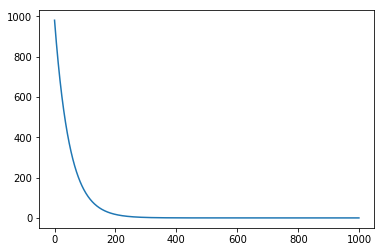

In [53]:
plt.plot(x_values)

Lastly, sometimes you want to run things *without* computing gradients:

In [54]:
x = torch.tensor([1000.], requires_grad=True)

# With gradient computation:
loss = x ** 2
print(loss.requires_grad)


# Without gradient computation:
with torch.no_grad():
    loss = x ** 2
print(loss.requires_grad)

True
False


**Highly Recommend**: https://pytorch.org/docs/stable/autograd.html